# Исследование рынка компьютерных игр

## Изучение данных

Импорт библиотек и чтение датасета:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

Просмотр данных:

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


Описание данных в таблице:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — возрастной рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Изучение данных:

In [4]:
df_games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


Описание числовых данных:

In [5]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Описание текстовых данных:

In [6]:
df_games.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Кол-во и % пропусков:

In [7]:
print(df_games.isna().sum(), '\n')
print(df_games.isna().mean() * 100)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64 

Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48
dtype: float64


Уникальные значения в текстовых столбцах:

In [8]:
for name in df_games.select_dtypes(include=['object']).columns:
    print(f'{name}:', df_games[name].unique(), '\n')

Name: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 

Platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

User_Score: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1

Проверка на явные дубликаты:

In [9]:
for name in df_games.select_dtypes(include=['object']).columns:
    df_games[name] = df_games[name].str.lower()

In [10]:
df_games.duplicated().sum()

0

**Выводы:**

- Заголовки столбцов не приведены к нижнему регистру;
- Отсутствуют названия для 2х игр;
- Есть пропуски в годах выпуска игр;
- Большое количество пропусков в данных об оценках и рейтинге игр;
- В столбце *user_score* есть значения *tbd*, которые не являются оценкой;
- У столбца *user_score* не числовой тип данных;
- Можно уменьшить разрядность для числовых столбцов;
- В данных нет полных дубликатов;
- Нет словаря для рейтинга от организации ESRB;
- ESRB рейтинг "K-A" - устаревшее обозначение для рейтинга "E".

## Предобработка данных

### Общая обработка данных:

Приведение заголовков к нижнему регистру:

In [11]:
df_games.columns = df_games.columns.str.lower()

Замена рейтинга "К-А" на "Е":

In [12]:
df_games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
rp         3
k-a        3
ao         1
Name: rating, dtype: int64

In [13]:
df_games.loc[df_games['rating'] == 'k-a', 'rating'] = 'e'

Создание словаря рейтинга ERSB:

In [14]:
ersb_dict = pd.DataFrame(data={'rating': ['ec', 'e', 'e10+', 't', 'm', 'ao', 'rp'], 
                               'rat_description': ['Early childhood, 3+', 'Everyone, 6+', 'Everyone 10 and older, 10+',
                               'Teen, 13+', 'Mature, 17+', 'Adults Only, 18+', 'Rating Pending']})

In [15]:
ersb_dict

,rating,rat_description
0,ec,"Early childhood, 3+"
1,e,"Everyone, 6+"
2,e10+,"Everyone 10 and older, 10+"
3,t,"Teen, 13+"
4,m,"Mature, 17+"
5,ao,"Adults Only, 18+"
6,rp,Rating Pending


### Изменение типов данных:

Смена типа данных столбца *user_score* c текстового на числовой.

Просмотр значений *user_score*:

In [16]:
df_games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1         2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Просмотр по годам значений tbd:

In [17]:
df_games[df_games['user_score'] == 'tbd']['year_of_release'].value_counts()

2,009.00    405
2,010.00    331
2,008.00    326
2,011.00    217
2,002.00    192
2,007.00    192
2,006.00    124
2,005.00    121
2,004.00    107
2,003.00     95
2,001.00     82
2,000.00     43
2,015.00     38
2,016.00     34
2,012.00     24
2,014.00     21
2,013.00     15
1,999.00      8
1,997.00      1
Name: year_of_release, dtype: int64

Смена типа данных, значения "tbd" (To Be Determined) при этом заменяются на NaN поскольку фактически пользовательский рейтинг для данных игр не определен:

In [18]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

Уменьшение разрядности числовых типов данных:

In [19]:
float_col = df_games.select_dtypes(include='float')
df_games[float_col.columns] = float_col.apply(pd.to_numeric, downcast='float')

In [20]:
df_games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float32
genre              16713 non-null object
na_sales           16715 non-null float32
eu_sales           16715 non-null float32
jp_sales           16715 non-null float32
other_sales        16715 non-null float32
critic_score       8137 non-null float32
user_score         7590 non-null float32
rating             9949 non-null object
dtypes: float32(7), object(4)
memory usage: 4.5 MB


### Заполнение пропусков:

#### Пропуски в названиях игр:

In [21]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,nan,NaN
14244,NaN,gen,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,nan,NaN


Удалим эти строки, поскольку их всего 2, они старые и о них отсутствует вся информация, кроме кол-ва продаж и платформы:

In [22]:
df_games = df_games.dropna(subset=['name']).reset_index(drop=True)

#### Пропуски в годах выпуска:

In [23]:
df_year = df_games[df_games['year_of_release'].isna()]

In [24]:
df_year.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.00,269.00,269.00,269.00,269.00,154.00,127.00
mean,nan,0.22,0.09,0.02,0.03,67.58,7.05
std,nan,0.42,0.21,0.09,0.08,14.83,1.54
min,nan,0.00,0.00,0.00,0.00,22.00,1.80
25%,nan,0.01,0.00,0.00,0.00,57.00,6.40
50%,nan,0.09,0.02,0.00,0.01,70.00,7.40
75%,nan,0.24,0.10,0.00,0.03,78.00,8.15
max,nan,4.26,2.36,0.77,0.71,94.00,9.50


In [25]:
df_year['name'].value_counts()

lego harry potter: years 5-7                                          7
happy feet two                                                        4
rock band                                                             4
bejeweled 3                                                           3
test drive unlimited 2                                                3
                                                                     ..
super robot wars og saga: masou kishin ii - revelation of evil god    1
steal princess                                                        1
james cameron's dark angel                                            1
without warning                                                       1
super breakout                                                        1
Name: name, Length: 232, dtype: int64

In [26]:
df_games[(df_games['name'] == "happy feet two") | (df_games['name'] == "lego harry potter: years 5-7")]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1608,lego harry potter: years 5-7,wii,nan,action,0.69,0.42,0.00,0.12,76.00,7.80,e10+
2131,lego harry potter: years 5-7,x360,nan,action,0.51,0.37,0.00,0.09,77.00,7.90,e10+
2272,lego harry potter: years 5-7,ps3,nan,action,0.36,0.41,0.00,0.15,76.00,8.30,e10+
3080,lego harry potter: years 5-7,ds,nan,action,0.34,0.25,0.00,0.07,69.00,nan,e10+
4817,lego harry potter: years 5-7,3ds,nan,action,0.18,0.19,0.00,0.03,71.00,6.50,e10+
6475,lego harry potter: years 5-7,psp,nan,action,0.10,0.10,0.00,0.06,nan,nan,e10+
7209,lego harry potter: years 5-7,pc,nan,action,0.05,0.14,0.00,0.03,80.00,8.50,e10+
8058,lego harry potter: years 5-7,psv,"2,012.00",action,0.07,0.07,0.00,0.03,64.00,6.80,e10+
10116,happy feet two,3ds,"2,011.00",action,0.08,0.02,0.00,0.01,nan,nan,NaN
10316,happy feet two,ps3,nan,action,0.09,0.00,0.00,0.01,nan,nan,NaN


По имеющимся в таблице данным (без поиска по внешним источникам и ручного заполнения) заполнить пропуски в годах выпуска нельзя. Оставим эти строки без изменения.

Причиной пропусков для части мультиплатформенных игр может быть то, что при заполнении данных указали год выхода только на какой-то одной платформе (заполнять этими значениями данные для других платформ нельзя, т.к. годы выхода на разных платформах могут отличаться). Для остальных ошибка при заполнении.

#### Пропуски в оценках игр:

Пропуски в оценках критиков:

In [27]:
df_critic = df_games[df_games['critic_score'].isna()]

In [28]:
df_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 1 to 16712
Data columns (total 11 columns):
name               8576 non-null object
platform           8576 non-null object
year_of_release    8461 non-null float32
genre              8576 non-null object
na_sales           8576 non-null float32
eu_sales           8576 non-null float32
jp_sales           8576 non-null float32
other_sales        8576 non-null float32
critic_score       0 non-null float32
user_score         573 non-null float32
rating             1895 non-null object
dtypes: float32(7), object(4)
memory usage: 569.5+ KB


Гистограмма пропусков в оценках по годам:

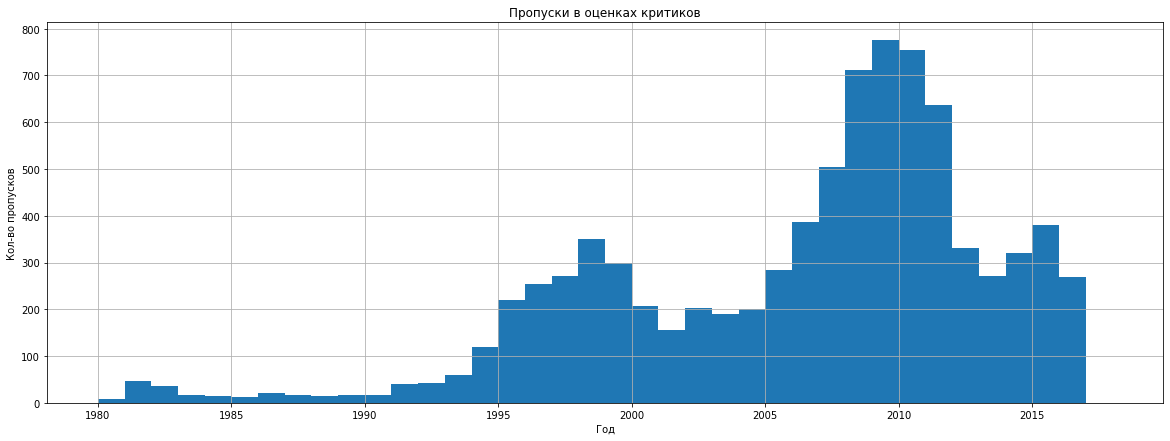

In [29]:
df_critic.hist('year_of_release', bins=38, range=(1980, 2018), figsize=(20,7))
plt.title('Пропуски в оценках критиков')
plt.xlabel('Год')
plt.ylabel('Кол-во пропусков')
plt.show()

Пропуски в оценках игроков:

In [30]:
df_user = df_games[df_games['user_score'].isna()]

Гистограмма пропусков в оценках по годам:

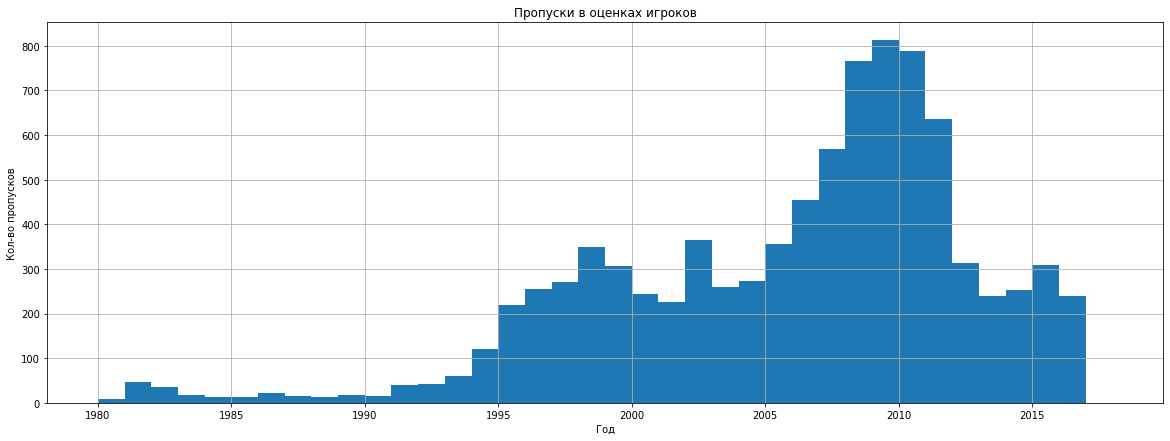

In [31]:
df_user.hist('year_of_release', bins=38, range=(1980, 2018), figsize=(20,7))
plt.title('Пропуски в оценках игроков')
plt.xlabel('Год')
plt.ylabel('Кол-во пропусков')
plt.show()

Гистограмма общего кол-ва игр по годам:

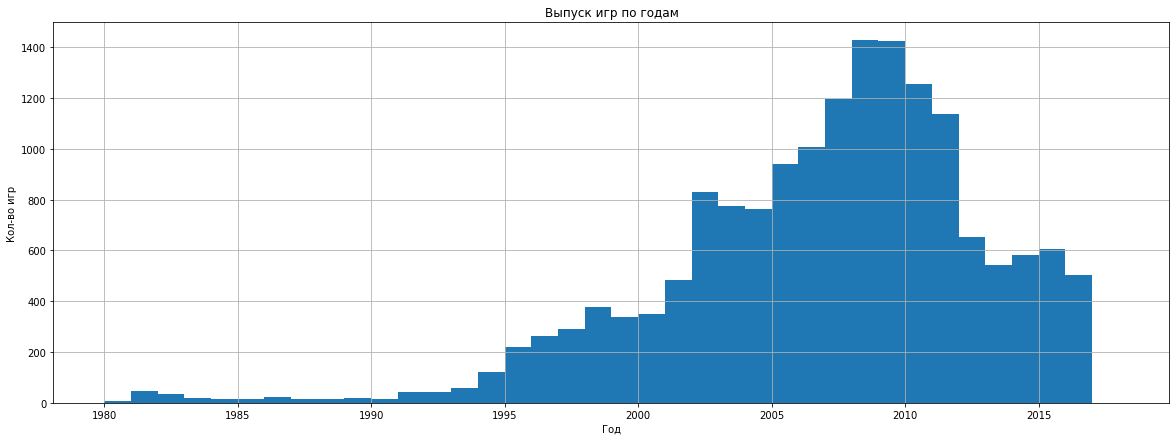

In [32]:
df_games.hist('year_of_release', bins=38, range=(1980, 2018), figsize=(20,7))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

Процент пропусков по годам от кол-ва игр:

In [33]:
df_group = df_games.groupby('year_of_release')['name', 'critic_score', 'user_score', 'rating'].count() 
#группировка данных с пропусками по годам

Графики процента пропусков в оценках по годам:

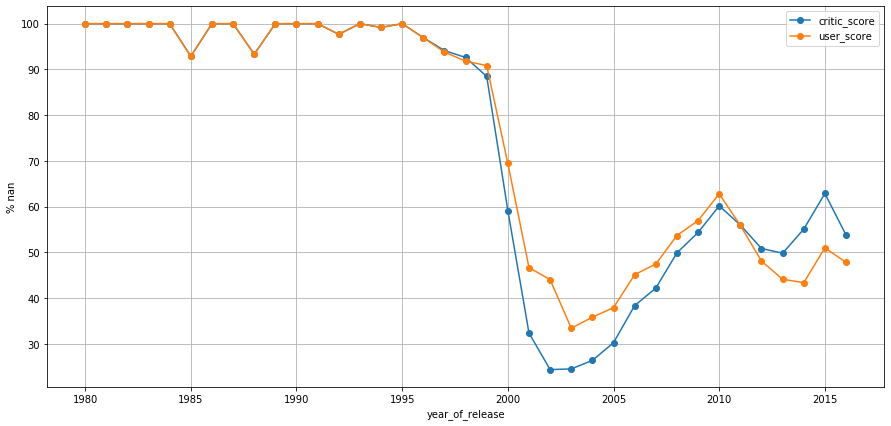

In [34]:
fig, ax = plt.subplots(figsize=(15, 7)) 

# Цикл построения графиков
for col in ['critic_score', 'user_score']:
    ax.plot(((1 - df_group[col] / df_group['name']) * 100), marker='o', label=col)

# Параметры граифков
ax.set_xlabel('year_of_release')
ax.set_ylabel('% nan')
ax.grid()
ax.legend(loc = 'upper right')
plt.show()   
    


- Оставим пропуски без заполнения, т.к. мнения угадать невозможно. Судя по данным, оценки для одной и той же игры на разных платформах могут сильно отличаться;
- До 1996 года отсутствуют данные об оценках, вероятно связано с маленьким кол-вом выпускаемых игр и отсутствием систем оценки и обратной связи;
- Пик кол-ва отсутствующих оценок приходится на 2008-2010 годы (так же пик по кол-ву выпускаемых игр). Максимальный % отсутствия оценок в 2010 году. Возможно данные об оценках брались только из одного источника, который охватывает не весь рынок.

#### Пропуски в возрастном рейтинге игр:

In [35]:
df = df_games.copy() #резервная копия df_games

Данные с пропусками в рейтинге:

In [36]:
df_not_ergb = df_games[df_games['rating'].isna()]

In [37]:
df_not_ergb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,nan,NaN
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,nan,NaN
5,tetris,gb,"1,989.00",puzzle,23.20,2.26,4.22,0.58,nan,nan,NaN
9,duck hunt,nes,"1,984.00",shooter,26.93,0.63,0.28,0.47,nan,nan,NaN
10,nintendogs,ds,"2,005.00",simulation,9.05,10.95,1.93,2.74,nan,nan,NaN


**Заполнение пропусков возрастного рейтинга, для игр, где он указан не для всех платформ**

Рейтинг для одной и той же игры на разных платформах скорее всего одинаков. Определим названия игр для которых он известен, и заполним для них пропуски для других платформ (если они есть).

Создадим словарь с рейтингами для названий игр:

In [38]:
df_ergb_dict = df_games[~df_games['rating'].isna()].groupby('name')['rating'].first().reset_index()
# игры, для которых не пропущен возрастной рейтинг

In [39]:
df_ergb_dict.head()

,name,rating
0,tales of xillia 2,t
1,.hack//infection part 1,t
2,.hack//mutation part 2,t
3,.hack//outbreak part 3,t
4,007 racing,t


Удаление столбца с рейтингом и присвоение его заного из словаря:

In [40]:
df_games = df_games.drop('rating', axis=1) # удаление столбца

In [41]:
df_games = df_games.merge(df_ergb_dict, on='name', how='left') # заполнение рейтинга

Проверка заполнения:

In [42]:
df['rating'].describe()

count     9949
unique       7
top          e
freq      3993
Name: rating, dtype: object

In [43]:
df_games['rating'].describe()

count     10386
unique        6
top           e
freq       4115
Name: rating, dtype: object

Потерялось одно уникально значение, определим какое:

In [44]:
print(f'бывшие уникальные значения: {df["rating"].unique()}')
print(f'новые уникальные значения: {df_games["rating"].unique()}')

бывшие уникальные значения: ['e' nan 'm' 't' 'e10+' 'ao' 'ec' 'rp']
новые уникальные значения: ['e' nan 'm' 't' 'e10+' 'ec' 'rp']


Пропало значение *ao*, посмотрим для каких игр:

In [45]:
df.query('rating == "ao"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
874,grand theft auto: san andreas,xb,"2,005.00",action,1.26,0.61,0.00,0.09,93.00,8.60,ao


Просмотр рейтингов для *grand theft auto: san andreas* на всех платформах:

In [46]:
df.query('name == "grand theft auto: san andreas"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,grand theft auto: san andreas,ps2,"2,004.00",action,9.43,0.40,0.41,10.57,95.00,9.00,m
874,grand theft auto: san andreas,xb,"2,005.00",action,1.26,0.61,0.00,0.09,93.00,8.60,ao
2114,grand theft auto: san andreas,pc,"2,005.00",action,0.00,0.93,0.00,0.04,93.00,8.90,m
10310,grand theft auto: san andreas,x360,"2,008.00",action,0.08,0.02,0.00,0.01,nan,7.50,m


Для нашего исследования значение возрастного рейтинга 17+ и 18+ для одной игры не принципиально, оставим данные после замены.

**Просмотр распределения пропусков в возрастном рейтинге по годам**

График изменения кол-ва пропусков в рейтинге по годам:

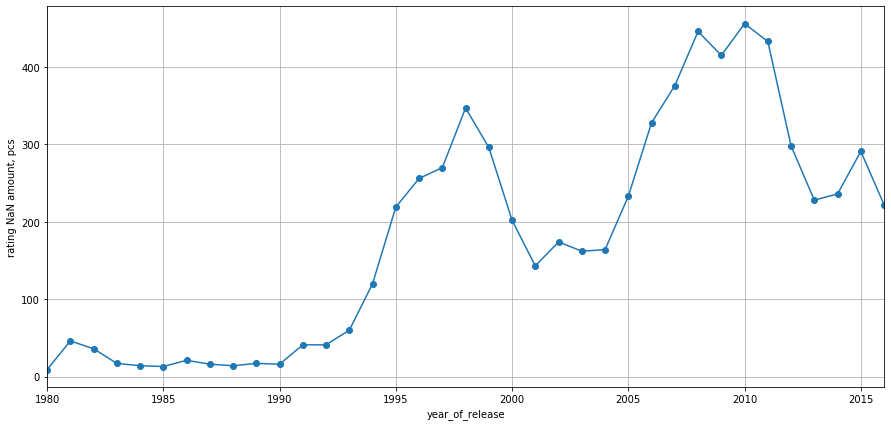

In [47]:
df_not_ergb.groupby('year_of_release')['name'].count().plot(style='o-', grid=True, figsize=(15,7))
plt.ylabel('rating NaN amount, pcs')
plt.show()                                                    

График процента не указанных значений рейтинга по годам:

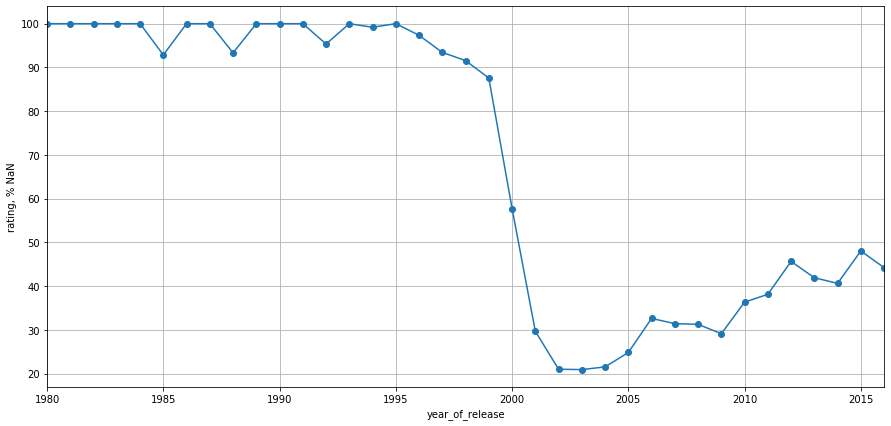

In [48]:
((1 - df_group['rating'] / df_group['name']) * 100).plot(style='o-', grid=True, figsize=(15,7))
plt.ylabel('rating, % NaN')
plt.show()

- Оставшиеся пропуски в возрастном рейтинге оставим без заполнения, т.к. по имеющимся данным (без внешних источников) их подобрать невозможно.
- Как таковая отсутствует маркировка рейтинга до 1996 года, система рейтинга ERGB была создана только в 1994 году. Рейтинг для нескольких игр 1985, 1990 годов вероятно был присвоен позже 1994.
- Кол-во пропусков в рейтинге с 2005 по 2016 годы постепенно растет, возможно это связано, что данные для более свежих игр ещё не до конца обновили.

### Подсчёт продаж для всех регионов:

In [49]:
df_games['total_sale'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
# подсчёт и добавление колонки в таблицу

In [50]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38


## Исследовательский анализ данных

### Распределение кол-ва выпускаемых игр по годам:

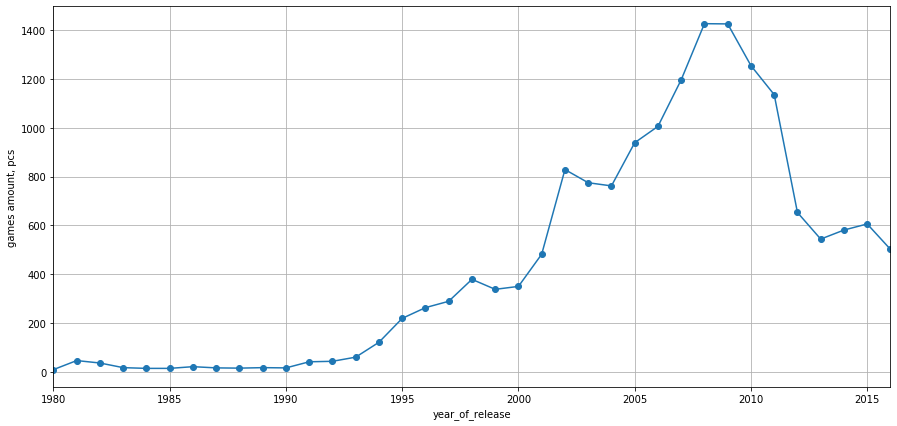

In [51]:
df_games.groupby('year_of_release')['name'].count().plot(style='o-', grid=True, figsize=(15,7))
plt.ylabel('games amount, pcs')
plt.show()

Судя по данным до 1995 года игрового рынка, как такового, почти не существовало. С 1995 года начинается его рост, с сильным рывком в 2000-2002 годах. Пик выпуска новых игр пришёлся на 2008-2009 годы. 

В рамках нашей задачи репрезентативным можно считать период за последние 5-10 лет, когда рынок игровой индустрии уже устоялся. А игроки на 2017 год это тоже поколение игроков, что и в 2005-2010 годах.

### Изменение продаж по платформам

In [52]:
df_sale = df_games.groupby(['platform', 'year_of_release'])['total_sale'].sum().reset_index()

In [53]:
df_sale.head()

,platform,year_of_release,total_sale
0,2600,"1,980.00",11.38
1,2600,"1,981.00",35.68
2,2600,"1,982.00",28.88
3,2600,"1,983.00",5.84
4,2600,"1,984.00",0.27


**Графики продаж по годам, для всех платформ:**

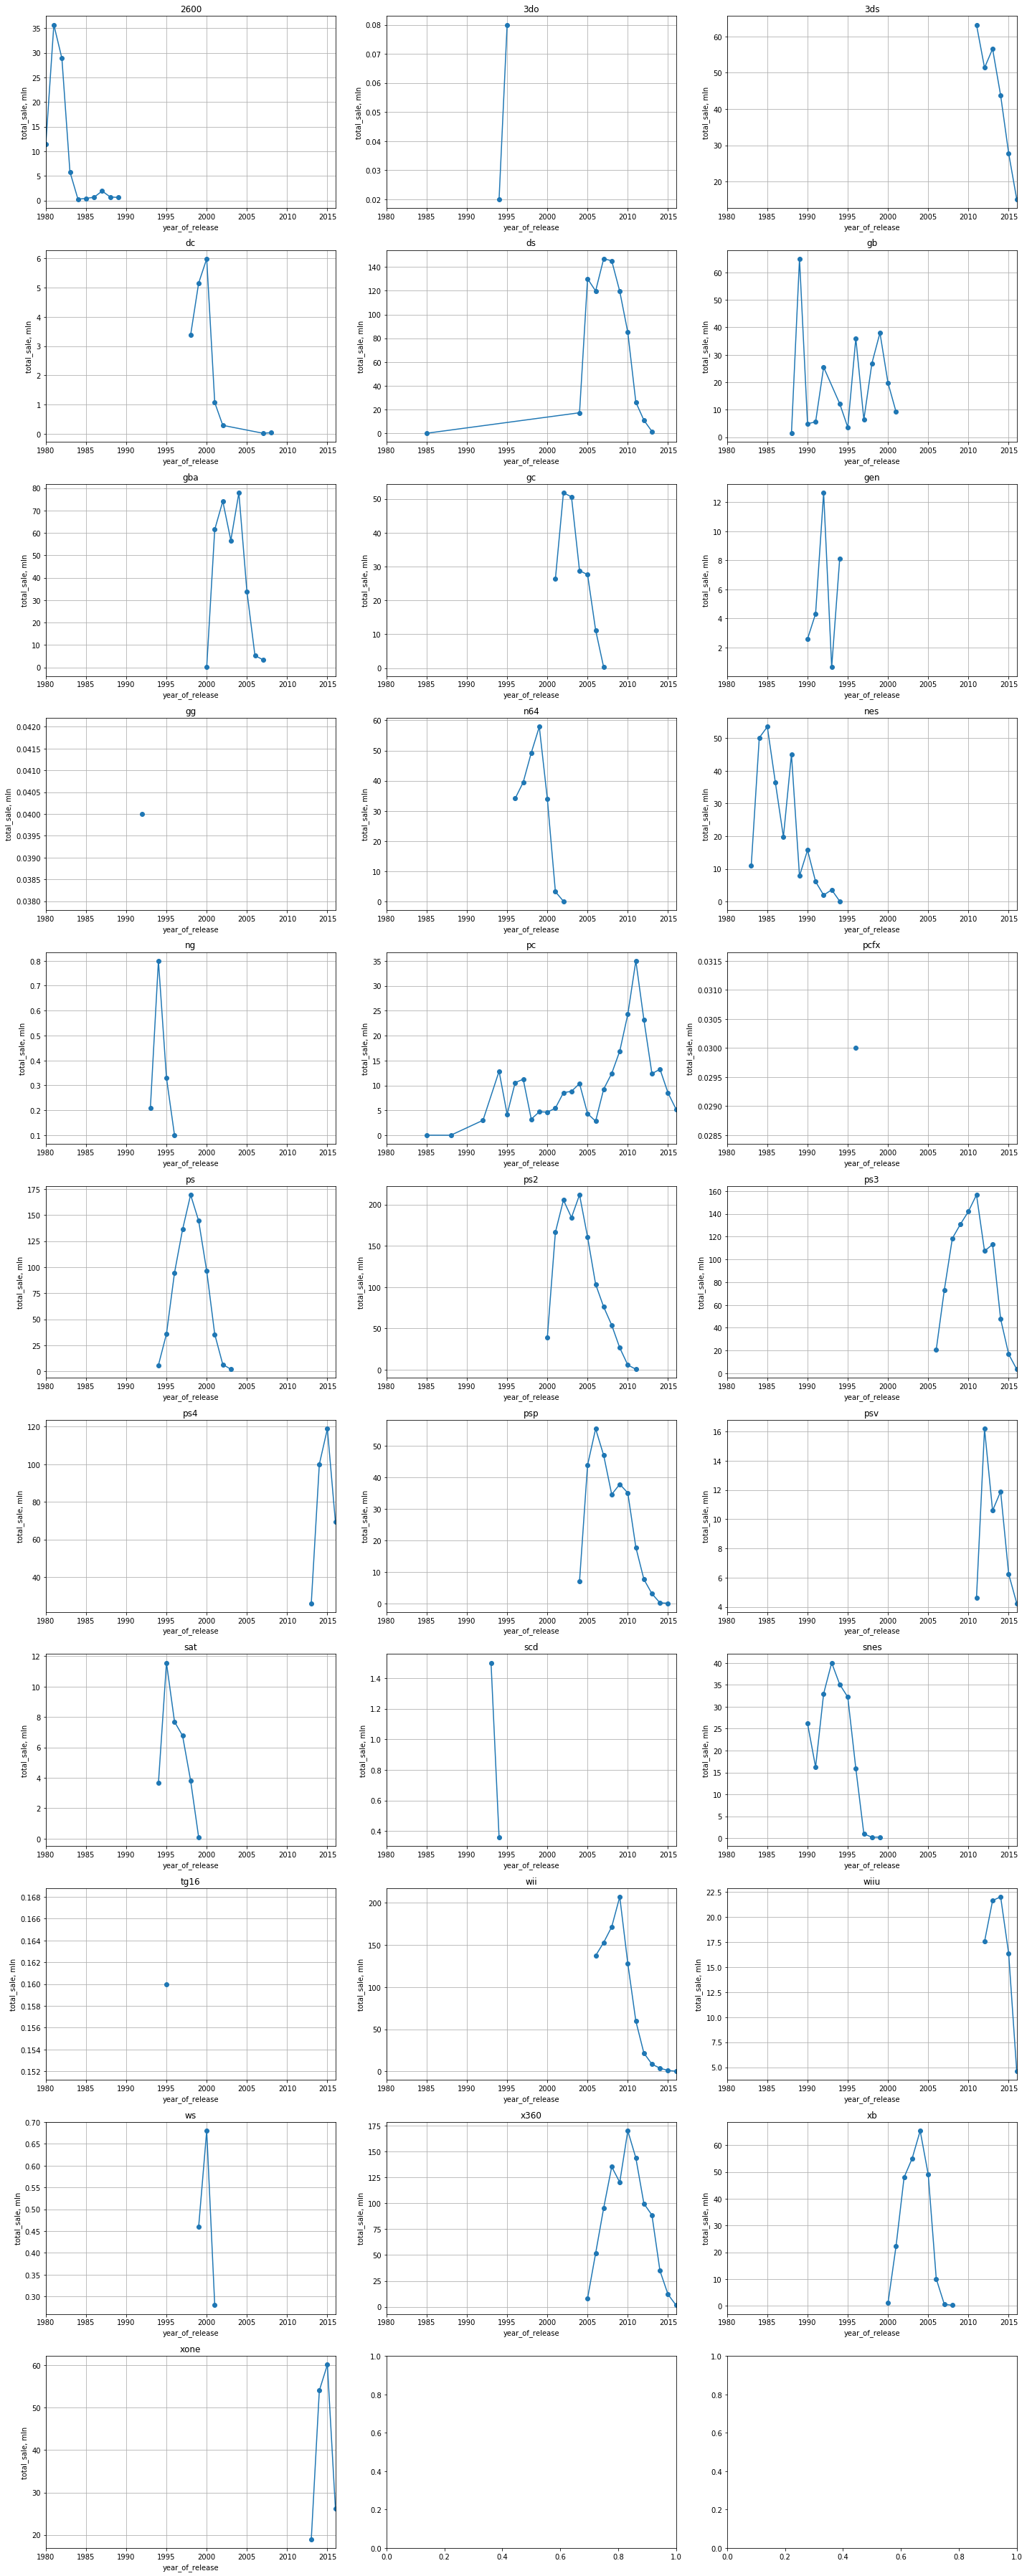

In [54]:
pltf_un = df_sale['platform'].unique() # выделение в переменную названий платформ

# кол-во строк и столбцов в "массиве" графиков
ncols = 3
nrows = int(np.ceil(pltf_un.shape[0] / ncols))

# Общие параметры
fig, axes = plt.subplots(nrows, ncols, figsize=(20,50))
axes = axes.flat

# Цикл для постройки графиков
for name, ax in zip(pltf_un, axes):
    df_plot = df_sale.query(f'platform == @name')
    ax.plot(df_plot['year_of_release'], df_plot['total_sale'], marker='o')
    
    # Параметры для каждого графика:
    ax.set_xlim([1980, 2016])
    ax.set_xlabel('year_of_release')
    ax.set_ylabel('total_sale, mln')
    ax.set_title(name)
    ax.grid()

plt.tight_layout()
plt.show()

Определение платформ с наибольшими суммарными продажами:

In [55]:
df_top_sale = df_sale.groupby('platform')['total_sale'].sum().sort_values(ascending=False).reset_index()
df_top_sale.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
platform,ps2,x360,ps3,wii,ds,ps,ps4,gba,psp,3ds,pc,gb,xb,nes,n64,snes,gc,xone,2600,wiiu
total_sale,"1,233.56",961.24,931.34,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32,86.48,82.19


Выберем платформы у которых больше 700 млн. продаж за всё время:

In [56]:
platform_top = df_top_sale['platform'].head(6)
platform_top

0     ps2
1    x360
2     ps3
3     wii
4      ds
5      ps
Name: platform, dtype: object

Графики распределения по годам для топ 6 платформ по общим продажам игр:

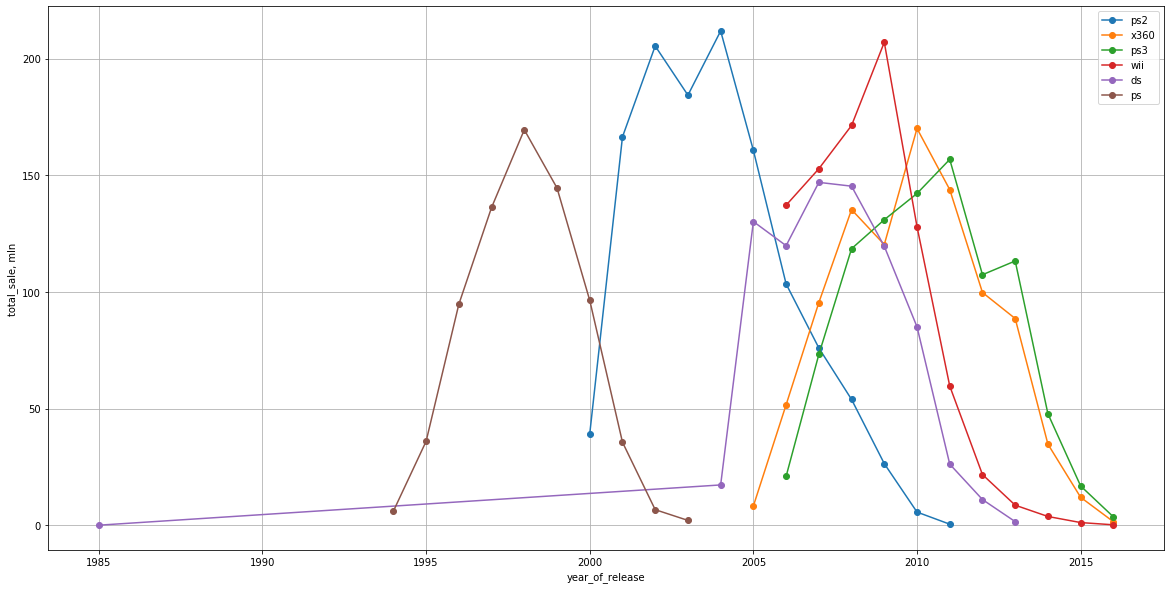

In [57]:
fig, ax = plt.subplots(figsize=(20,10))

for name in platform_top:
    df_plot = df_sale.query(f'platform == @name')
    ax.plot(df_plot['year_of_release'], df_plot['total_sale'], marker='o', label=name)

ax.set_xlabel('year_of_release')
ax.set_ylabel('total_sale, mln')
ax.legend(loc = 'upper right')
ax.grid()
plt.show()

- Наиболее успешным платформам с момента появления надо 4-6 лет для выхода на пик продаж и приблизительно через такой же промежуток времени они исчезают с рынка.

**Годы жизни разных платформ**

Группировка лет по платформам:

In [58]:
df_years_life = df_sale.groupby('platform').agg({'year_of_release': 
                                                 ['first', 'last', 'count']}).reset_index()

df_years_life.columns=['platform', 'first_year', 'last_year', 'count_years']

Просмотр лет жизни для разных платформ:

In [59]:
df_years_life.sort_values('count_years', ascending=False).T

,13,5,11,28,19,16,25,4,17,0,...,8,12,18,30,27,22,1,24,9,14
platform,pc,gb,nes,x360,psp,ps2,wii,ds,ps3,2600,...,gen,ng,ps4,xone,ws,scd,3do,tg16,gg,pcfx
first_year,"1,985.00","1,988.00","1,983.00","2,005.00","2,004.00","2,000.00","2,006.00","1,985.00","2,006.00","1,980.00",...,"1,990.00","1,993.00","2,013.00","2,013.00","1,999.00","1,993.00","1,994.00","1,995.00","1,992.00","1,996.00"
last_year,"2,016.00","2,001.00","1,994.00","2,016.00","2,015.00","2,011.00","2,016.00","2,013.00","2,016.00","1,989.00",...,"1,994.00","1,996.00","2,016.00","2,016.00","2,001.00","1,994.00","1,995.00","1,995.00","1,992.00","1,996.00"
count_years,26,13,12,12,12,12,11,11,11,10,...,5,4,4,4,3,2,2,1,1,1


Квартильные, средние и крайние значения для всех платформ:

In [60]:
df_years_life['count_years'].describe()

count   31.00
mean     7.68
std      5.08
min      1.00
25%      4.00
50%      7.00
75%     11.00
max     26.00
Name: count_years, dtype: float64

Распределение значений для всех платформ:

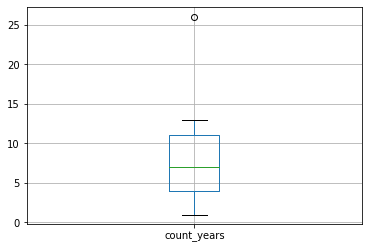

In [61]:
df_years_life[['count_years']].boxplot()
plt.show()

Выделение половины наиболее успешных платформ, для которых общие продажи игр больше 200 млн.:

In [62]:
top_16 = df_top_sale['platform'].head(16)

Распределение значений для наиболее успешных платформ и без учета PC (как выброс):

In [63]:
df_years_life.query('platform in @top_16 and count_years < 20')['count_years'].describe()

count   15.00
mean     9.87
std      2.59
min      4.00
25%      8.50
50%     11.00
75%     12.00
max     13.00
Name: count_years, dtype: float64

Распределение значений для 6 самых успешных платформ:

In [64]:
df_years_life.query('platform in @platform_top')['count_years'].describe()

count    6.00
mean    11.17
std      0.75
min     10.00
25%     11.00
50%     11.00
75%     11.75
max     12.00
Name: count_years, dtype: float64

**Выводы:**

- Среднее время жизни для всех платформ 7,5 лет;
- Среднее время жизни наиболее успешных платформ 10-11 лет;
- Максимальное время жизни для всех платформ кроме ПК 13 лет;
- 20% всех платформ просуществовали не более 3 лет;
- ПК - уникальная платформа, которая существует уже 26 лет (вероятно связано с возможностью обновления комплектующих), пик популярности пришелся на 2011 год. Игры на PC по прежнему продаются в объёме порядка 5 млн. копий;
- Пик продаж, как правило приходится на 4-6 год жизни платформы;
- Выпуск платформ новых поколений от одного производителя приводит к прекращению продаж для старых моделей.

### Выделение актуальных данных и их анализ:

Выделим, как актуальный для оценки продаж период начиная с 2010 года в который попадают платформы, существующие на сегодняшний день и этот период захватывает пик продаж игр 2008-2010 годов. (В тоже время для оценки влияния рейтингов и оценок на уровни продаж допустимо использовать данные начиная с 2005 года.)

In [65]:
df_actual = df_games.query('year_of_release >= 2010')

Информация о данных за период:

In [66]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16712
Data columns (total 12 columns):
name               5277 non-null object
platform           5277 non-null object
year_of_release    5277 non-null float32
genre              5277 non-null object
na_sales           5277 non-null float32
eu_sales           5277 non-null float32
jp_sales           5277 non-null float32
other_sales        5277 non-null float32
critic_score       2312 non-null float32
user_score         2499 non-null float32
rating             3316 non-null object
total_sale         5277 non-null float32
dtypes: float32(8), object(4)
memory usage: 371.0+ KB


Выделим колонки с данными о продажах:

In [67]:
sale_col = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sale']

Сгруппируем данные о продажах по платформам и годам:

In [68]:
df_actual_sales = df_actual.groupby(['platform', 'year_of_release']
                  )[sale_col].sum().reset_index()

#### Графики распределения продаж за последние 6 лет:

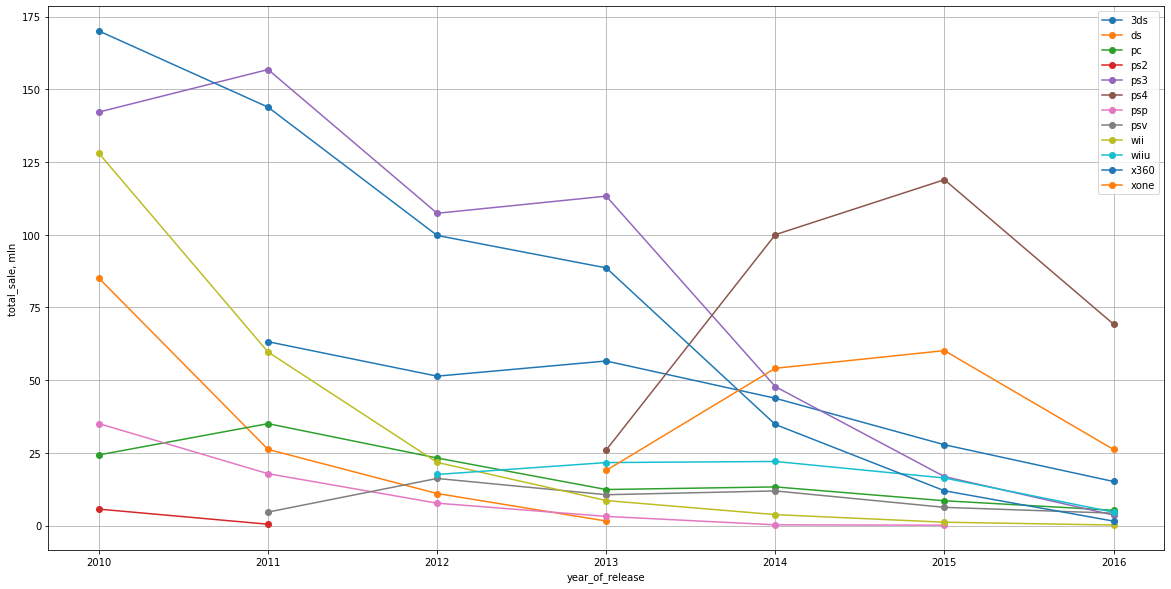

In [69]:
fig, ax = plt.subplots(figsize=(20,10))

for name in df_actual_sales['platform'].unique():
    df_plot = df_actual_sales.query(f'platform == @name')
    ax.plot(df_plot['year_of_release'], df_plot['total_sale'], marker='o', label=name)

ax.set_xlabel('year_of_release')
ax.set_ylabel('total_sale, mln')
# ax.set_xlim(2010,2016)
ax.legend(loc = 'upper right')
ax.grid()
plt.show()

- Наиболее потенциально выгодными выглядят платформы *PS4* и *Xone*, которые появились в 2013 году и продажи на которых скорее всего вырастут;
- Потенциально прибыльной в 2016 году также может остаться *3DS*, пик которой прошёл, но продажи могут ещё сохраниться на уровне 10 млн. копий за год;
- Наиболее стабильная платформа *PC* сорее всего тоже будет продаваться на уровне 5 млн. копий за год;
- Также на уровне 5 млн. копий способны продаваться игры для платформы 2012 года - *wiiu*, хотя они ежегодно падают;
- Старые поколения платформ скорее всего почти уйдут с рынков.

In [70]:
df_actual_sales.query('platform == "wiiu"')

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sale
49,wiiu,"2,012.00",8.89,5.28,2.13,1.26,17.56
50,wiiu,"2,013.00",9.85,6.70,3.57,1.53,21.65
51,wiiu,"2,014.00",10.50,6.66,3.19,1.68,22.03
52,wiiu,"2,015.00",6.76,5.01,3.45,1.13,16.35
53,wiiu,"2,016.00",2.10,1.48,0.67,0.35,4.60


#### Ящик с усами по глобальным продажам игр в разбивке по платформам:

Уберем из графиков данные по PS2 поскольку это очень старая консоль и в данные попал только её последний год жизни:

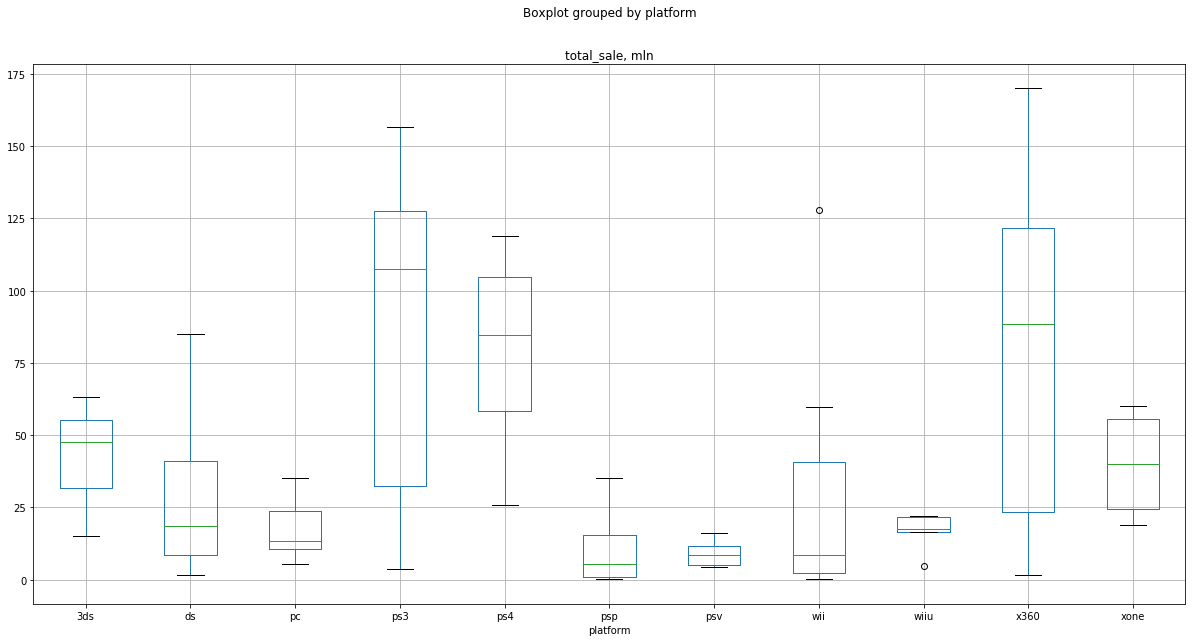

In [71]:
df_actual_sales.query('platform not in ["ps2"]').boxplot('total_sale', by='platform', figsize=(20,10))
plt.title('total_sale, mln')
plt.show()

- Наиболее популярные платформы *PS3, PS4, X360* с высокими медианными значениями ежегодных продаж. PS3 и Х360 как старые платформы, которые прошли пик популярности и уходят с рынка, имеют самый большой разброс кол-ва продаж по годам.
- Новая консоль *Xone* имеет стабильные показатели ежегодных продаж с относительно небольшим разбросом и медианой в районе 40 млн. копий в год.
- Такие платформы как *PC, PSV, Wiiu* стабильно держали или держат небольшую долю рынка на протяжении своего существования. Выброс у *Wiiu* отображает резкое падение продаж в последний год.
- *PSP* и *DS* старые консоли на излёте популярности. В отслеживаемом периоде ежегодно теряли в продажах игр до ухода с рынка.
- *3DS* относительно новая консоль 2011 года хорошо стартовала в 2011 году, но ежегодные продажи игр падают. Медиана ~48 млн. копий игр в год

#### Влияние отзывов на продажи для одной из популярных платформ

Оценка кол-ва пропусков и кол-ва значений в отзывах для самых популярных платформ за актуальный период:

In [72]:
scores = ['critic_score', 'user_score'] # переменная с именами столбцов с оценками

In [73]:
for name in ['ps3', 'ps4', 'x360']:
    result = df_actual.query('platform == @name')[scores] # % пропусков
    print(f'{name}: \n{result.isna().mean()}') # кол-во значений оценок
    print(result.count(), '\n')

ps3: 
critic_score   0.47
user_score     0.39
dtype: float64
critic_score    475
user_score      539
dtype: int64 

ps4: 
critic_score   0.36
user_score     0.34
dtype: float64
critic_score    252
user_score      257
dtype: int64 

x360: 
critic_score   0.36
user_score     0.27
dtype: float64
critic_score    432
user_score      495
dtype: int64 



Рассмотрим x360:

In [74]:
df_xbox = df_actual.query('platform == "x360"')[sale_col + scores] # Таблица с ценами и оценками для x360

In [75]:
df_xbox.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 14 to 16652
Data columns (total 7 columns):
na_sales        680 non-null float32
eu_sales        680 non-null float32
jp_sales        680 non-null float32
other_sales     680 non-null float32
total_sale      680 non-null float32
critic_score    432 non-null float32
user_score      495 non-null float32
dtypes: float32(7)
memory usage: 23.9 KB


Диаграммы рассеяния оценок критиков и пользователей с глобальными продажами:

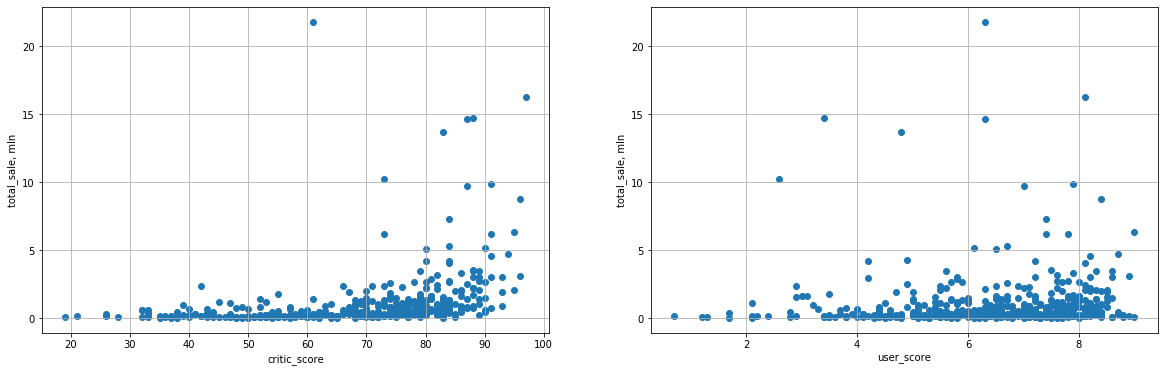

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(20,6))

for col, ax in zip(scores, axes):
    ax.scatter(df_xbox[col], df_xbox['total_sale'])
    ax.set_xlabel(col)
    ax.set_ylabel('total_sale, mln')
    ax.grid()

Матрица корреляции значений для платформы x360 за последние 6 лет:

In [77]:
df_xbox.corr()

,na_sales,eu_sales,jp_sales,other_sales,total_sale,critic_score,user_score
na_sales,1.00,0.86,0.65,0.96,0.98,0.32,0.06
eu_sales,0.86,1.00,0.60,0.96,0.94,0.36,0.07
jp_sales,0.65,0.60,1.00,0.65,0.66,0.28,0.14
other_sales,0.96,0.96,0.65,1.00,0.99,0.35,0.07
total_sale,0.98,0.94,0.66,0.99,1.00,0.34,0.07
critic_score,0.32,0.36,0.28,0.35,0.34,1.00,0.60
user_score,0.06,0.07,0.14,0.07,0.07,0.60,1.00


- Есть слабая корреляция между оценками критиков и кол-вом продаж;
- Корреляция между оценками играков и количеством продаж почти отсутствует;
- Корреляция между оценками критиков и продажами больше всего для Европы и меньше всего для Японии, в тоже время в Японии оценки игроков коррелируют с продажами в 2 раза сильнее, чем во всем остальном мире (хотя корреляция по прежнему низкая);
- Почти все бестсселеры среди игр получили оценку критиков больше 70 баллов;
- Достаточно много хорошо продаваемых игр с низкими оценками от игроков.

Можно сделать вывод, что в последние годы оценки игр очень слабо влияют на продажи игр. В тоже время Почти все, наиболее продаваемые игры получили высокую оценку от критиков (не ниже 70), на это стоит обращать внимание при прогнозировании. 

**Посмотрим корреляции продаж для всех платформ в актуальных данных:**

In [78]:
# Избавимся от PS2 в актуальных данных, как давно ушедшей с рынка консоли
df_actual = df_actual.query('"ps2" not in platform') 

In [79]:
for plat in df_actual['platform'].unique():
    df = df_actual[df_actual['platform'].isin([plat])][['total_sale'] + scores]
    display(f'{plat:_^37}')
    display(df.corr())

'________________x360_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.34,0.07
critic_score,0.34,1.00,0.60
user_score,0.07,0.60,1.00


'_________________ps3_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.40,0.07
critic_score,0.40,1.00,0.60
user_score,0.07,0.60,1.00


'_________________ds__________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.28,0.25
critic_score,0.28,1.00,0.62
user_score,0.25,0.62,1.00


'_________________ps4_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


'_________________3ds_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.35,0.22
critic_score,0.35,1.00,0.75
user_score,0.22,0.75,1.00


'_________________wii_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.31,0.15
critic_score,0.31,1.00,0.47
user_score,0.15,0.47,1.00


'________________xone_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


'________________wiiu_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.35,0.40
critic_score,0.35,1.00,0.77
user_score,0.40,0.77,1.00


'_________________pc__________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.34,-0.01
critic_score,0.34,1.00,0.48
user_score,-0.01,0.48,1.00


'_________________psp_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.40,0.19
critic_score,0.40,1.00,0.52
user_score,0.19,0.52,1.00


'_________________psv_________________'

,total_sale,critic_score,user_score
total_sale,1.00,0.13,0.01
critic_score,0.13,1.00,0.73
user_score,0.01,0.73,1.00


Для остальных платформ корреляции оценок и продаж аналогичны с *x360*. Исключение - wiiu единственная платформа, где оценки пользователей влияют на продажи даже сильнее, чем оценки критиков (корреляция 0,4).

### Распределение игр по жанрам:

In [80]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
14,kinect adventures!,x360,"2,010.00",misc,15.00,4.89,0.24,1.69,61.00,6.30,e,21.82
16,grand theft auto v,ps3,"2,013.00",action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,"2,013.00",action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
27,pokemon black/pokemon white,ds,"2,010.00",role-playing,5.51,3.17,5.65,0.80,nan,nan,NaN,15.13
29,call of duty: modern warfare 3,x360,"2,011.00",shooter,9.04,4.24,0.13,1.32,88.00,3.40,m,14.73


Группировка актуальных данных по жанрам:

In [81]:
gr = df_actual.groupby('genre')
df_genre = gr[sale_col].sum() # суммирование продаж по регионам по жанрам
df_genre = df_genre.join(gr['name'].count()) # добавление кол-ва игр в жанре
df_genre = df_genre.rename(columns={'name': 'count'})

In [82]:
df_genre['sale_per_game'] = df_genre['total_sale'] / df_genre['count']

In [83]:
df_genre = df_genre.sort_values('total_sale', ascending=False)
df_genre

,na_sales,eu_sales,jp_sales,other_sales,total_sale,count,sale_per_game
genre,,,,,,,
action,290.06,233.27,72.11,76.24,671.68,1489,0.45
shooter,237.44,171.43,14.04,56.77,479.68,409,1.17
sports,155.59,115.77,15.22,38.45,325.03,561,0.58
role-playing,112.05,75.48,103.52,24.21,315.26,567,0.56
misc,123.78,66.08,24.26,20.38,234.50,573,0.41
racing,46.11,54.75,6.68,15.14,122.68,237,0.52
platform,54.72,38.20,15.81,10.66,119.39,151,0.79
fighting,38.76,20.22,13.89,8.23,81.10,196,0.41
simulation,26.39,26.39,13.30,5.67,71.75,217,0.33


График продаж жанров по регионам:

In [84]:
reg_sales = sale_col.copy() # Переменная для региональных продаж
reg_sales.pop(-1)

'total_sale'

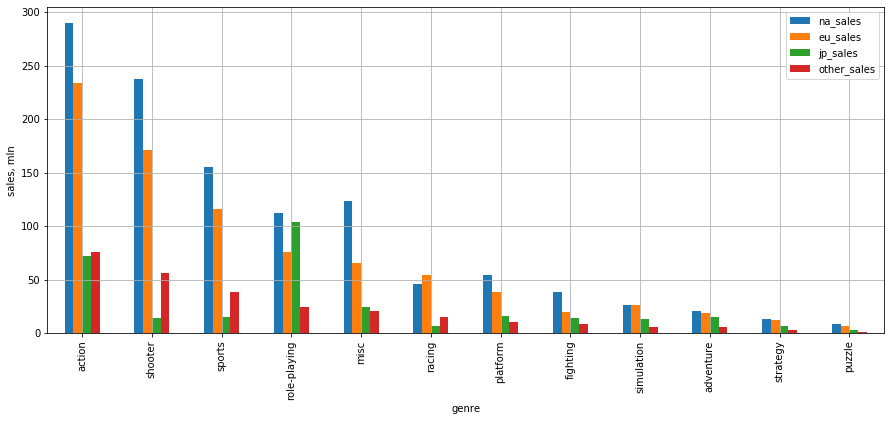

In [85]:
df_genre.plot(y=reg_sales, kind='bar', grid=True, figsize=(15,6))
plt.ylabel('sales, mln')
plt.show()

Графики общих продаж, количества игр и продаж на одну игру по жанрам:

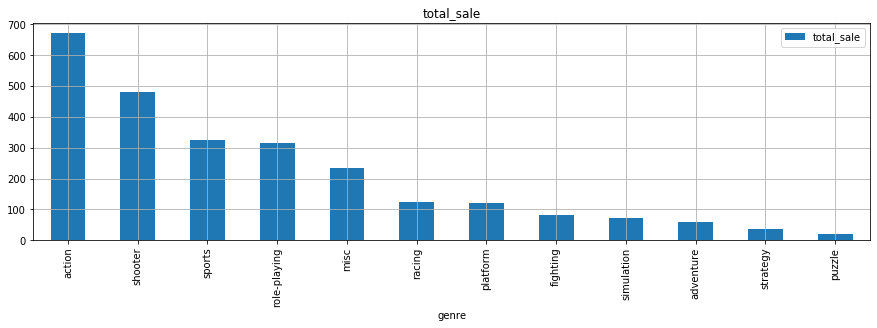

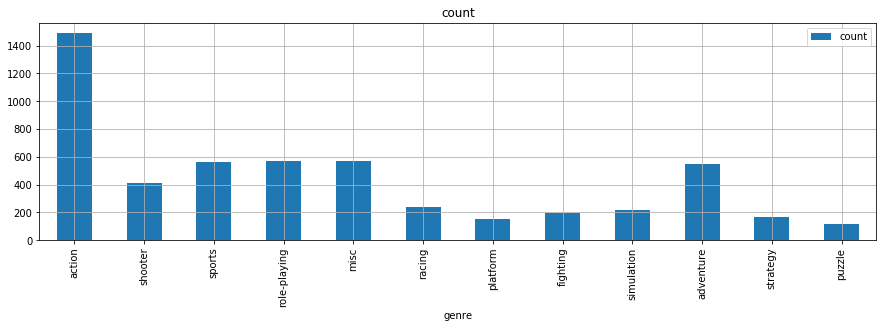

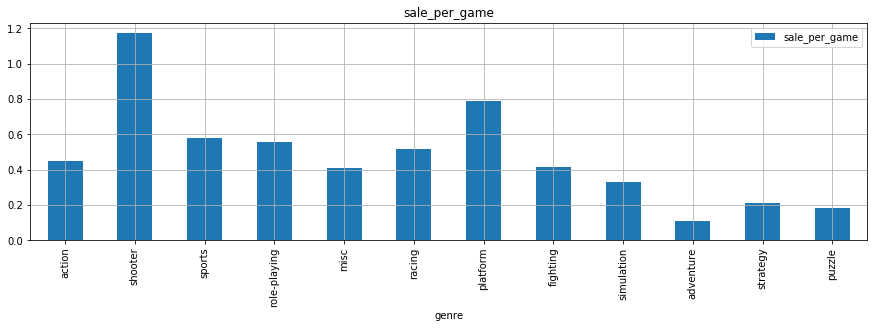

In [86]:
for col in ['total_sale', 'count', 'sale_per_game']:
    df_genre.plot(y=col, kind='bar', grid=True, figsize=(15,4), title=col)
    plt.show()

- Самые продаваемые жанры экшен-игры и ienths, при этом экшен-игры самый часто встречаемый жанр среди всех игр;
- На втором месте по прадажам спортивные и ролевые игры, показатели продаж на одну игру у них на среднем уровне;
- Наименее продаваемы жанры - пазлы, а потом стратегииб, также значения кол-ва игр этих жанров одни из самых маленьких и у них низкое кол-во продаж на одну игру;
- Стоит отметить платформеры, у которых не смотря на небольшой уровень общих продаж и малое число выпускаемых игр высокое кол-во продаж на одну выпущенную игру.

Самыми прибыльными можно считать экшен-игры и шутеры, при этом кол-во продаж экшен-игр обусловлено в том числе их огромным количеством, скорее всего они широко пересекаются с другими жанрами. В тоже время шутеры, которых выпускают меньше, чем ролевых и спортивных игр, уверенно занимают вторую строчку продаж и их можно назвать самым популярным жанром. 

Спортивные и ролевые игры хорошо продаются, их довольно много среди всех жанров и у них хорошие показатели продаж на одну игру. Так что они уверенно удерживают свой сегмент рынка.

## Портрет пользователя по регионам NA, EU, JP

In [87]:
reg_sales.pop(-1) # переменная со столбцами регионов NA, EU, JP
reg_sales

['na_sales', 'eu_sales', 'jp_sales']

### Популярные платформы:

Группировка продаж платформ по жанрам:

In [88]:
# Группировка данных по платформам
df_platform = df_actual.groupby('platform')[sale_col].sum()

part_col = ['na_part', 'eu_part', 'jp_part'] # Названия столбцов для доли продаж

# Добавление доли продаж
for col, part in zip(reg_sales, part_col):
    df_platform[part] = df_platform[col] / df_platform['total_sale']

In [89]:
df_platform

,na_sales,eu_sales,jp_sales,other_sales,total_sale,na_part,eu_part,jp_part
platform,,,,,,,,
3ds,82.65,61.27,100.62,13.27,257.81,0.32,0.24,0.39
ds,59.66,28.06,27.90,8.13,123.75,0.48,0.23,0.23
pc,39.07,68.82,0.00,14.07,121.96,0.32,0.56,0.00
ps3,229.25,213.60,59.26,85.63,587.74,0.39,0.36,0.10
ps4,108.74,141.09,15.96,48.35,314.14,0.35,0.45,0.05
psp,9.65,7.59,42.20,4.61,64.05,0.15,0.12,0.66
psv,12.47,13.07,21.84,6.43,53.81,0.23,0.24,0.41
wii,121.20,65.91,17.75,18.11,222.97,0.54,0.30,0.08
wiiu,38.10,25.13,13.01,5.95,82.19,0.46,0.31,0.16


Выделение топ 5 платформ для каждого региона:

In [90]:
region = ['NA', 'EU', 'JP']
for col1, col2, reg in zip(reg_sales, part_col, region):
    display(f'Region {reg}:', df_platform[[col1, col2]].sort_values(col1, ascending=False).head().T)

'Region NA:'

platform,x360,ps3,wii,ps4,xone
na_sales,334.18,229.25,121.20,108.74,93.12
na_part,0.61,0.39,0.54,0.35,0.58


'Region EU:'

platform,ps3,x360,ps4,pc,wii
eu_sales,213.60,163.41,141.09,68.82,65.91
eu_part,0.36,0.30,0.45,0.56,0.30


'Region JP:'

platform,3ds,ps3,psp,ds,psv
jp_sales,100.62,59.26,42.20,27.90,21.84
jp_part,0.39,0.10,0.66,0.23,0.41


- В Северной Америке и Европе топ 5 платформ очень похож, разница в том что Европейцы довольно много играют на PC в то время как Американцы предпочитают консоли Xbox. Для этих регионов доли продаж игр составляют от 30 до 60% от всех продаж на соответствующей платформе. Суммарно на эти регионы приходится 70-90% всех продаж для платформ из топ 5.
- В Японии за исключением PS3, топ платформ отличается от Америки и Европы. Японцы явно предпочитают портативные консоли. Судя по всему в Японии мало игроков, по сравнению с другими регионами, к примеру на продажи игр для PS3 в Японии приходится лишь 10% всех продаж для этой консоли, но в регионе она занимает 2е место по популярности. Или ds c 23% от общих продаж на 4 месте, в то время как в Америке и Европе она даже не попала в топ.

### Популярные жанры

Функция для вывода топ 5 значений для регионов:

In [91]:
def top_reg(df):
    for col, reg in zip(reg_sales, region):
        display(f'Region {reg}:', df[[col]].sort_values(col, ascending=False).head().T)

Топ 5 жанров по регионам:

In [92]:
top_reg(df_genre)

'Region NA:'

genre,action,shooter,sports,misc,role-playing
na_sales,290.06,237.44,155.59,123.78,112.05


'Region EU:'

genre,action,shooter,sports,role-playing,misc
eu_sales,233.27,171.43,115.77,75.48,66.08


'Region JP:'

genre,role-playing,action,misc,platform,adventure
jp_sales,103.52,72.11,24.26,15.81,15.31


Аналагичная ситуация с платформами:
- Америка и Европа похожа, за исключением, что в Европе больше предпочитают ролевые игры;
- Японци обожают ролевые игры и не особо играют в шутеры, зато много платформеров и приключенческих игр. Связано скорее всего с преобладанием мобильных игровых платформ.

### Влияние рейтинга

Группировка данных по рейтингу:

In [93]:
df_ersb = df_actual.groupby('rating')[sale_col].sum()

Графики продаж по рейтингу по регионам:

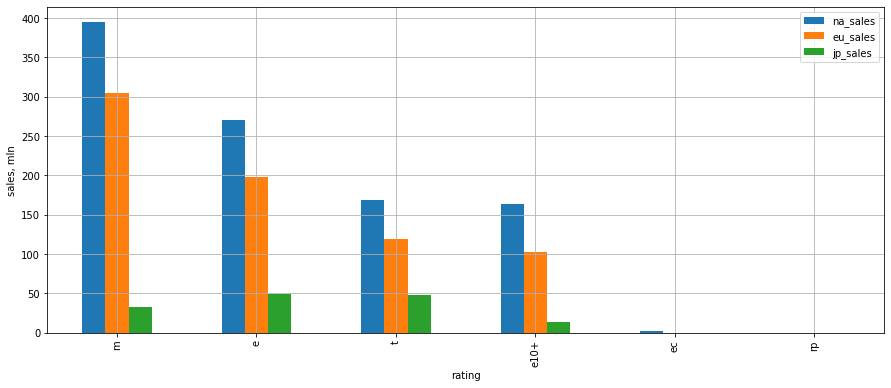

In [94]:
df_ersb.sort_values('total_sale', ascending=False).plot(y=reg_sales, kind='bar', grid=True, figsize=(15,6))
plt.ylabel('sales, mln')
plt.show()

- Идентичная картина для Америки и Европы: наиболее продаваемые игры от 17+, затем идут игры для всех возрастов (6+), для подростков и 10+.
- В Японии больше всего продаются игры для всех возрастов и для подростков, только потом идут 17+ и 10+

In [95]:
ersb_dict

,rating,rat_description
0,ec,"Early childhood, 3+"
1,e,"Everyone, 6+"
2,e10+,"Everyone 10 and older, 10+"
3,t,"Teen, 13+"
4,m,"Mature, 17+"
5,ao,"Adults Only, 18+"
6,rp,Rating Pending


### Портреты пользователей (выводы):

**Регион Северная Америка (NA):**

Топ 5 популярных платформ:
1. X360 
2. PS3
3. Wii
4. PS4
5. Xone

Топ 5 популярных жанров:
1. action
2. shooter
3. sports
4. misc
5. role-playing

Наиболее продаваемые игры с рейтингом 17+ и для всех

**Регион Европа (EU):**

Топ 5 популярных платформ:
1. PS3 
2. x360
3. PS4
4. PC
5. Wii

Топ 5 популярных жанров:
1. action
2. shooter
3. sports
4. role-playing 
5. misc

Наиболее продаваемые игры с рейтингом 17+ и для всех

**Регион Япония (JP):**

Топ 5 популярных платформ:
1. 3DS
2. PS3
3. PsP
4. DS
5. PsV

Топ 5 популярных жанров:
1. role-playing
2. action
3. misc
4. platform 
5. adventure

Наиболее продаваемые игры с рейтингом для всех и для подростков

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Экспериментально полученные данные не могут подтвердить гипотезу равенства, поэтому для проверки нам надо убедиться, что они её хотя бы не опровергают. За нулевую гипотезу всегда принимается гипотеза равенства, а альтернативная гипотеза противоположна нулевой.

Сформулируем нулевую и альтернативную гипотезы для двухстороннего теста:
- **Нулевая гипотеза Н0**: средние пользовательские рейтинги платформ *Xbox One* и *PC* равны. 
- **Альтернативная гипотеза Н1**: средние пользовательские рейтинги платформ *Xbox One* и *PC* различаются.
- **Критерий**: средние совокупностей оценок пользователей для платформ *Xbox One* и *PC* равны между собой.

Избавление от пропусков в оценках пользователей:

In [96]:
df_user = df_actual.copy()
df_user = df_user.dropna(subset=['user_score'])

In [97]:
df_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
14,kinect adventures!,x360,"2,010.00",misc,15.00,4.89,0.24,1.69,61.00,6.30,e,21.82
16,grand theft auto v,ps3,"2,013.00",action,7.02,9.09,0.98,3.96,97.00,8.20,m,21.05
23,grand theft auto v,x360,"2,013.00",action,9.66,5.14,0.06,1.41,97.00,8.10,m,16.27
29,call of duty: modern warfare 3,x360,"2,011.00",shooter,9.04,4.24,0.13,1.32,88.00,3.40,m,14.73
32,call of duty: black ops,x360,"2,010.00",shooter,9.70,3.68,0.11,1.13,87.00,6.30,m,14.62


Проверка гипотезы:

In [98]:
alpha = 0.05 # Уровень статистической значимости

result = st.ttest_ind(df_user.query('platform == "xone"')['user_score'], 
                      df_user.query('platform == "pc"')['user_score'], equal_var=False)

print('p-значение:', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются')
else:
    print('Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы')

p-значение: 0.9801719620954326 

Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы


**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action (экшен-игры) и Sports («спортивные соревнования») разные.

Для проверки гипотеза нужно попытаться опровергнуть гипотезу о равенстве пользовательских рейтингов. 

По аналогии с прошлой сформулируем нулевую и альтернативную гипотезы для двухстороннего теста:
- **Нулевая гипотеза Н0**: средние пользовательские рейтинги жанров *Action* и *Sports* равны. 
- **Альтернативная гипотеза Н1**: средние пользовательские рейтинги жанров *Action* и *Sports* различаются.
- **Критерий**: средние совокупностей оценок пользователей для рейтингов *Action* и *Sports* равны между собой.

Проверка гипотезы:

In [99]:
alpha = 0.01 # Уровень статистической значимости

result = st.ttest_ind(df_user.query('genre == "action"')['user_score'], 
                      df_user.query('genre == "sports"')['user_score'], equal_var=False)

print('p-значение:', result.pvalue, '\n')

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров *Action* и *Sports* различаются')
else:
    print('Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров *Action* и *Sports* одинаковы')

p-значение: 1.606484761210626e-15 

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров *Action* и *Sports* различаются


Сравним средние пользовательские рейтинги жанров *Action* и *Sports*:

In [100]:
df_user.query('genre == "action"')['user_score'].mean()

6.7800517

In [101]:
df_user.query('genre == "sports"')['user_score'].mean()

5.892283

**Вывод:** Средние пользовательские рейтинги жанров *Action* и *Sports* различаются. Средний рейтинг жанра *Action* выше, чем у *Sports*.

## Выводы:

**Общие выводы:**

- Самый крупный рынок игровой индустрии Северная Америка, потом идёт Европа и замыкает тройку Япония.
- Кол-во продаж игр последние годы на спаде;
- Многие платформы находятся у правой границы статистического жизненного цикла, наиболее новые и перспективные на 2017 год это PS4 и Xbox One. Так же к относительно не старым (от 2011 года и моложе) можно отнести Wiiu, 3DS и PsV.
- Самая стабильная платформа, которая на исчезнет с рынка в ближайшие годы - PC.
- Профиль игроков Северной Америки и Европы очень схож. В обоих регионах исторически 1е строчки продаж игр занимают Xbox 360 и PS3, которым на смену скорее всего придут Xbox One и PS4. В Европе так же большая доля рынка сохраняется за PC. Так же в обоих регионах схожи предпочтения по жанрам игр и влияние возрастного рейтинга на продажи.
- Япония спецефический регион, где преобладают портативные платформы (самые перспективные 3DS и PsV) и PS3, которую так же может сменить PS4 в скором времени. В связи с этим отличаются предпочтения по жанрам у игроков.

Стоит обратить внимание на рейтинг критиков, наибольший шанс на хорошие продажи у игр с оценкой выше 70. В то же время оценки пользователей почти не влияют на уровень продаж.

Наиболее перспективные платформы на 2017 год:

- PS4 - возможные продажи на уровне 70 млн. копий;
- Xbox One - возможные продажи на уровне 25 млн. копий;
- 3DS - возможные продажи на уровне 10 млн. копий;
- Wiiu - возможные продажи на уровне 5 млн. копий;
- PC - возможные продажи на уровне 5 млн. копий;

**Выводы по регионам Северная Америка и Европа:**

Преобладание игр на платформы PS4 и Xbox One, 2я очередь: Wiiu и PC

Наиболее перспективные жанры игр:

1. Экшн игры
2. Шутеры
3. Спортивные игры
4. Ролевые игры

Самые продаваемы игры как правило с рейтингами "Для взрослых" и "Для всех"

**Выводы по региону Япония:**

Преобладание игра на платформы 3DS, PsV, PS4. Игроки предпочитают портативные консоли.

Наиболее перспективные жанры игр:
1. Ролевые игры
2. Экшн игры
3. Платформеры
4. Приключения

Самые продаваемы игры как правило с рейтингами "Для всех" и "Для подростков"